In [1]:
import pywt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cPickle as pkl
import pandas as pd
import cufflinks as cf
import sys
sys.path
sys.path.append('../..')

import methods.interpolation
from methods.interpolation import wavelet_coefficient_interp

import methods.denoise
from methods.denoise import wavelet_sureshrink

In [2]:
with open('../../../data/locs.tsv', 'r') as f_handle:
    chan_locs = pd.read_csv(f_handle, delimiter='\t').as_matrix()
    chan_locs = np.array(chan_locs[3:, 1:])
with open('../../../data/sub-0001_trial-01.pkl', 'rb') as f_handle:
    f_real = pkl.load(f_handle)
    f_real = f_real - np.mean(f_real, axis = 1).reshape(-1, 1)
wave = 'db2'
p_local = {
    'bad_chans': [47, 51, 109, 111],
}
p_global = {
    'wave': wave,
    'verbose': True,
    'chan_locs': chan_locs,
    'k': 3
}

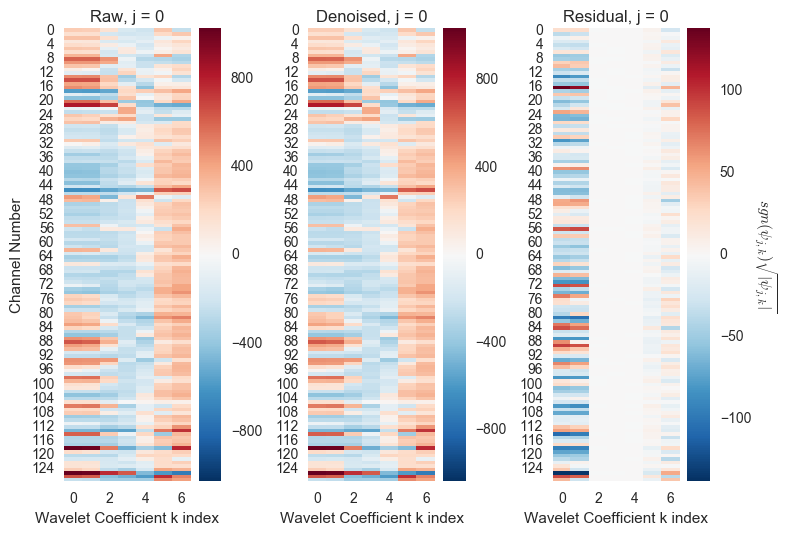

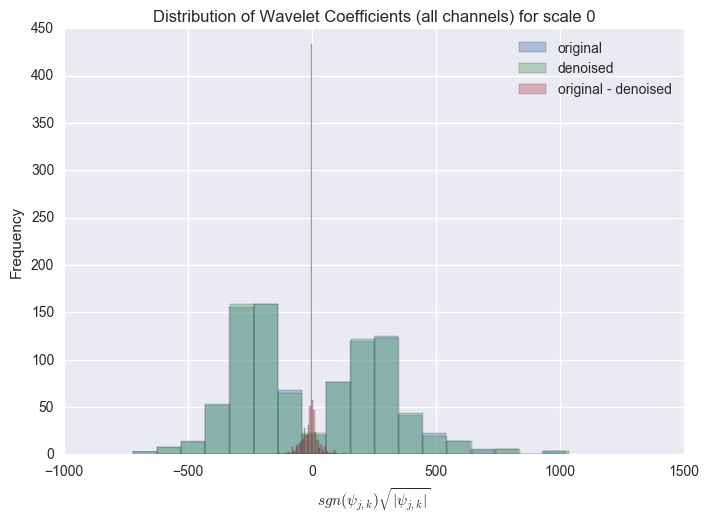

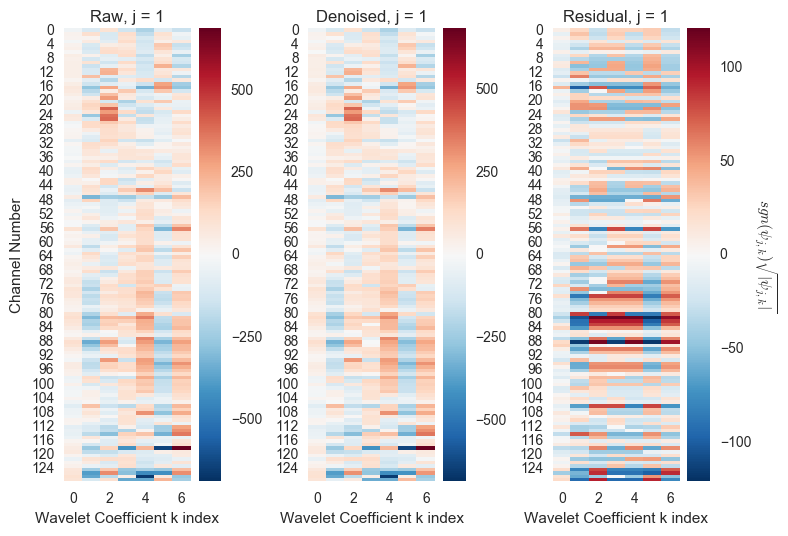

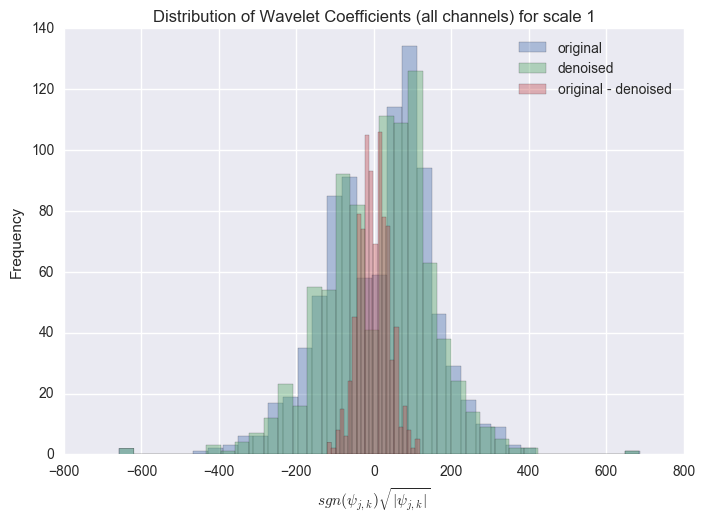

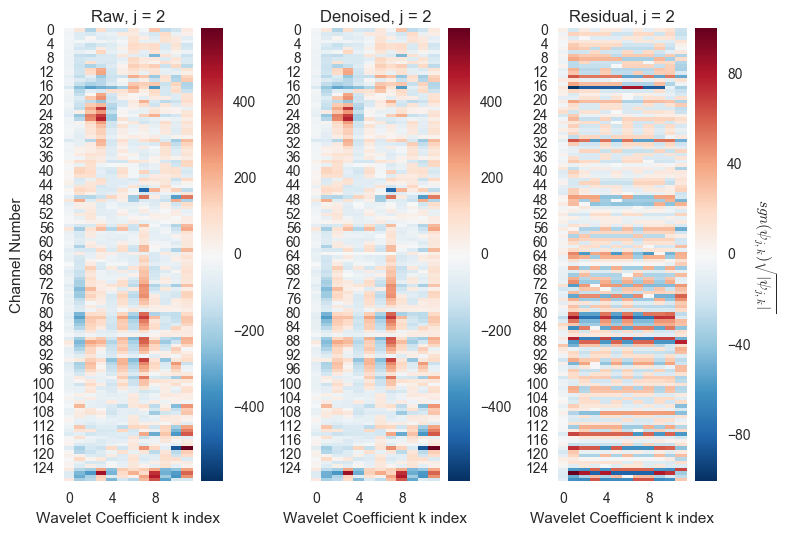

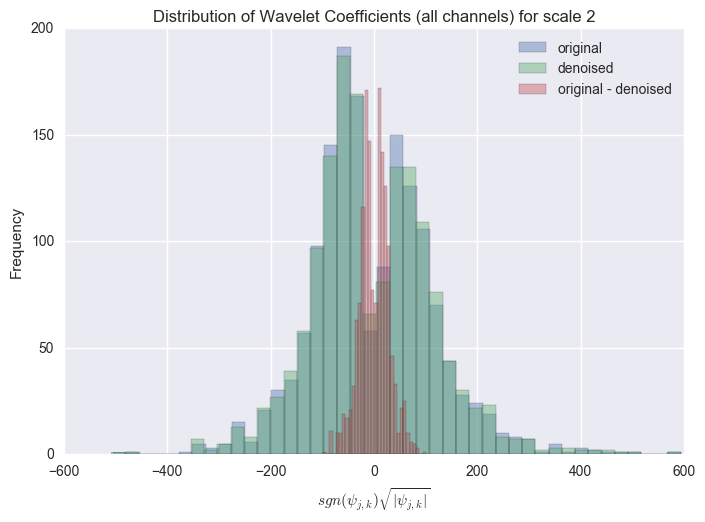

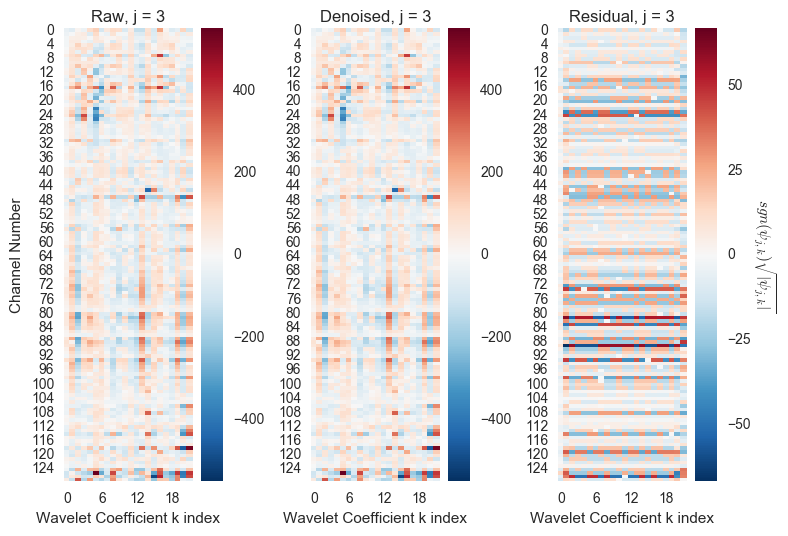

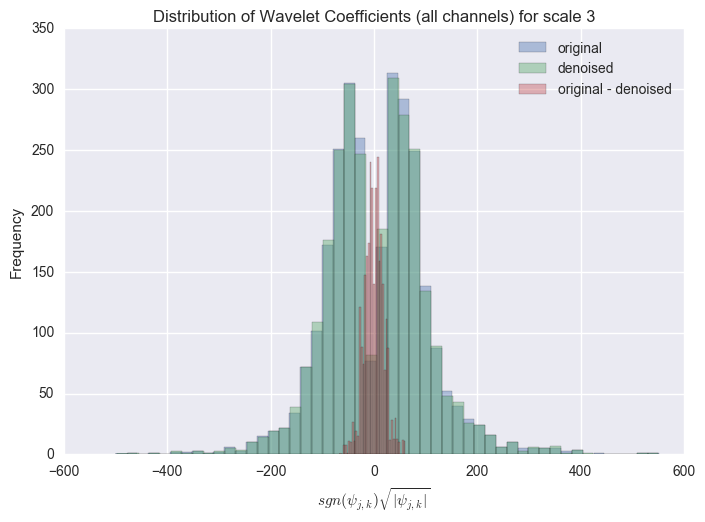

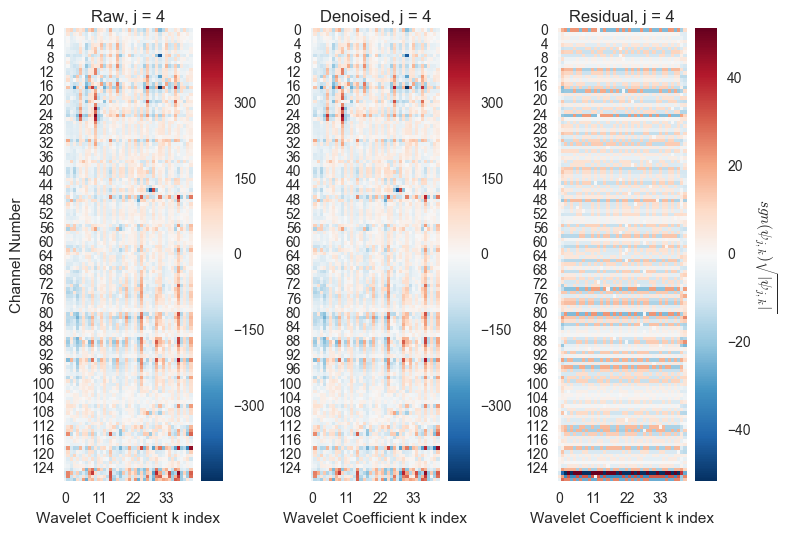

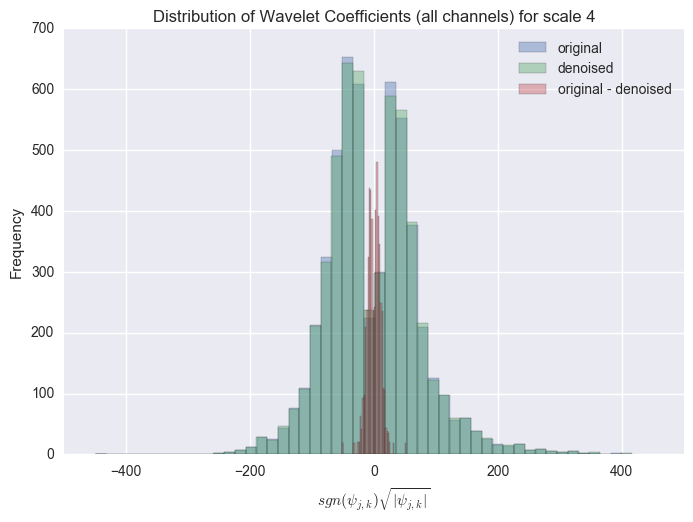

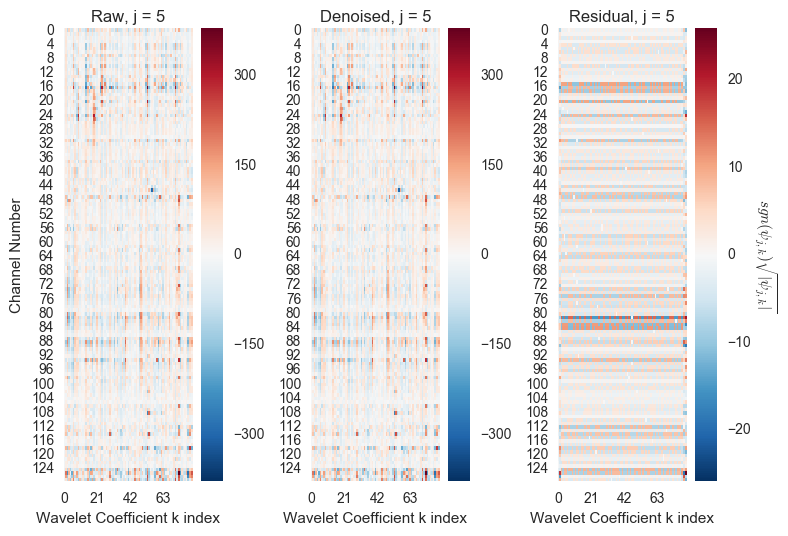

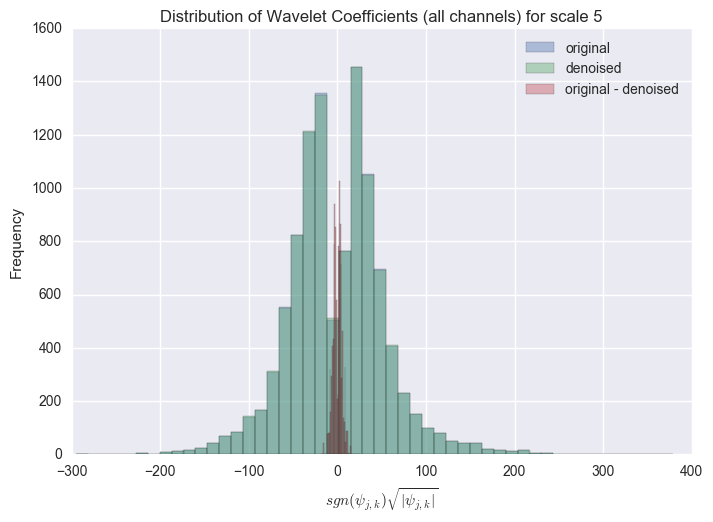

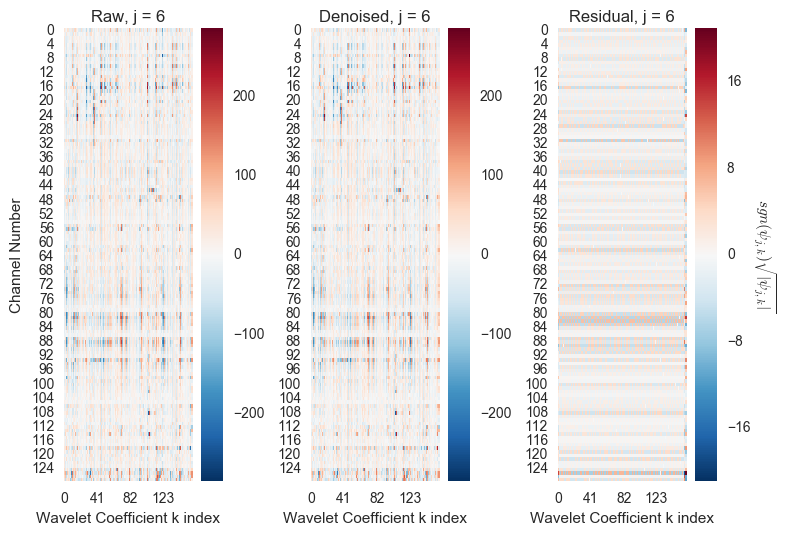

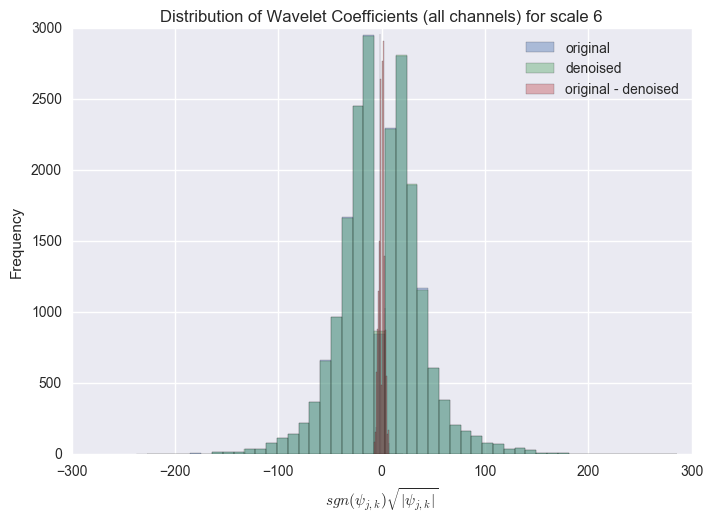

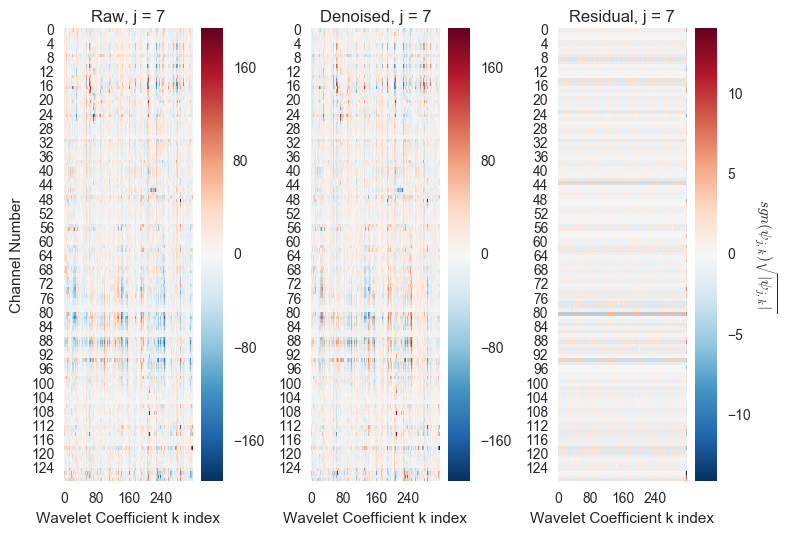

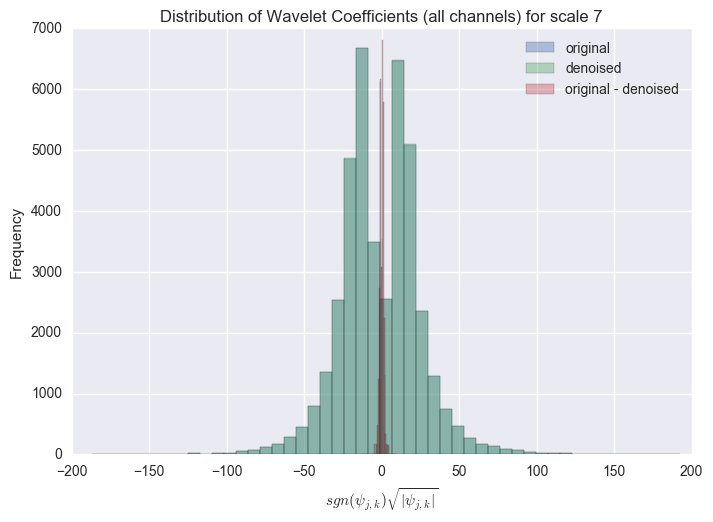

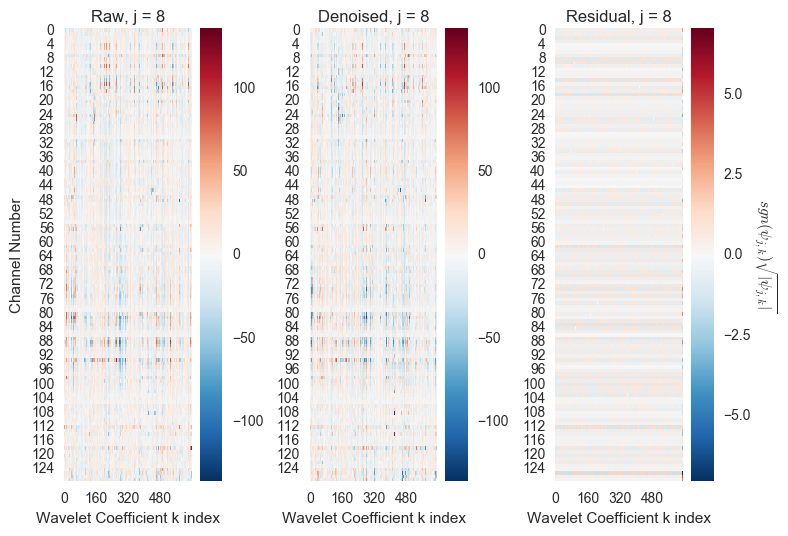

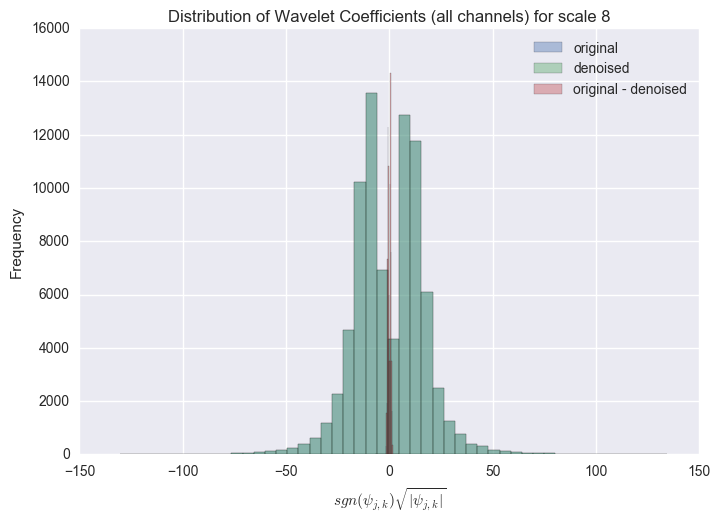

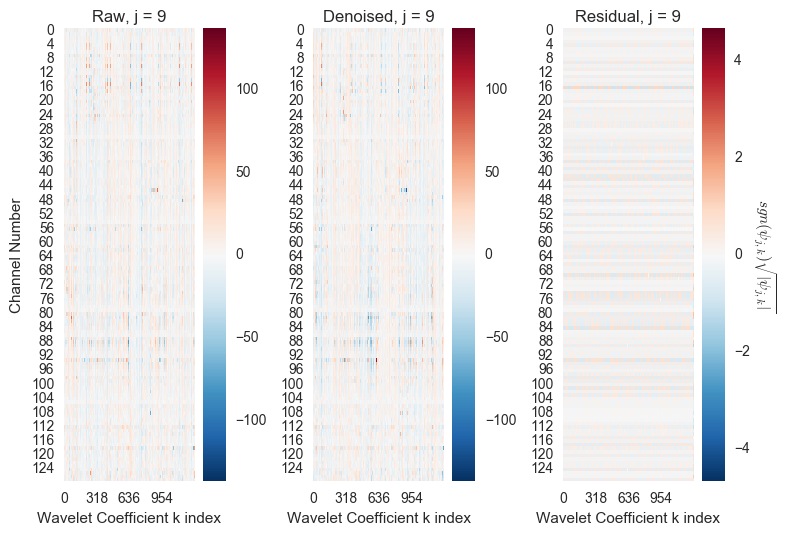

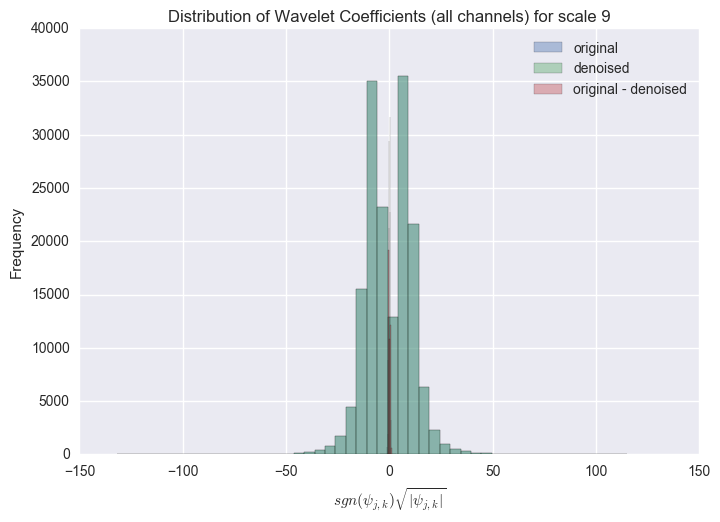

In [3]:
d_den = wavelet_sureshrink(f_real, p_local, p_global)

bad chan = 47 , closest = [34 37 42] , distances = [ 0.01447752  0.01733172  0.01777434] num levels = 16
bad chan = 51 , closest = [61 50 52] , distances = [ 0.02037253  0.02960308  0.03520418] num levels = 16
bad chan = 109 , closest = [117 115 118] , distances = [ 0.02203302  0.02891569  0.03102019] num levels = 16
bad chan = 111 , closest = [102 113 112] , distances = [ 0.01447752  0.01733172  0.01777434] num levels = 16


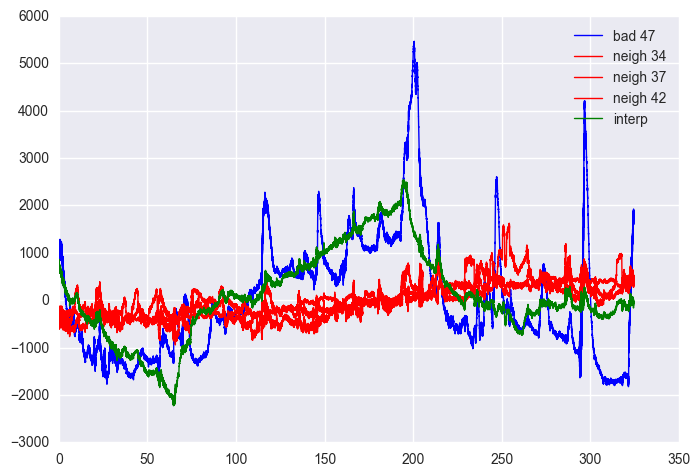

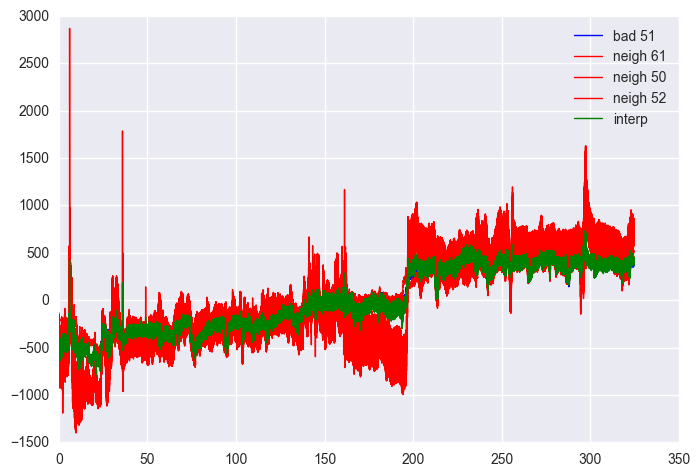

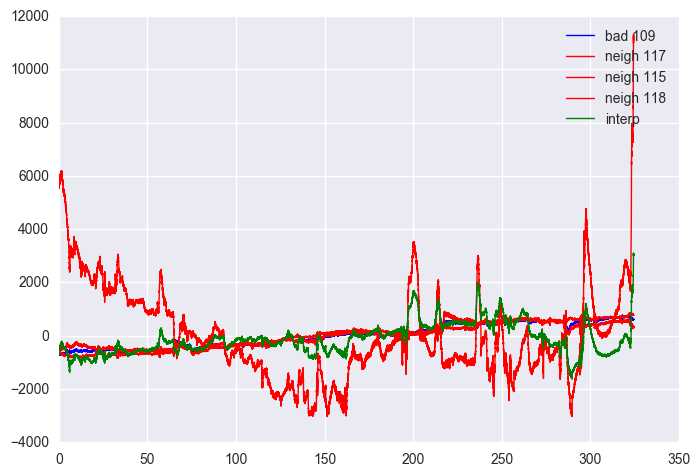

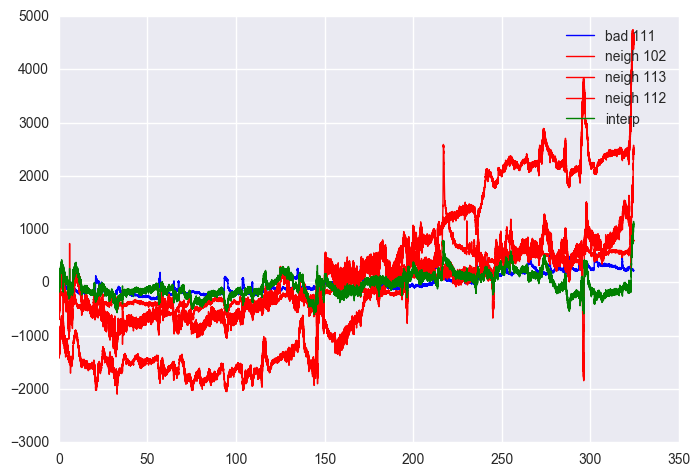

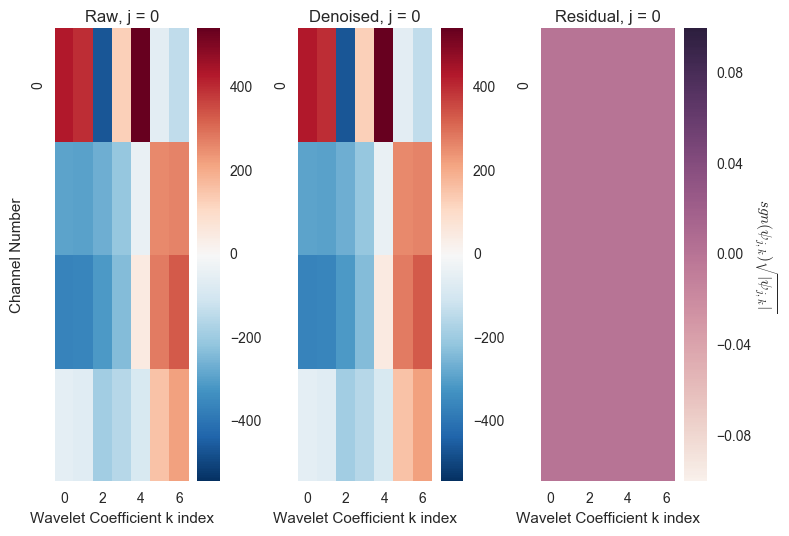

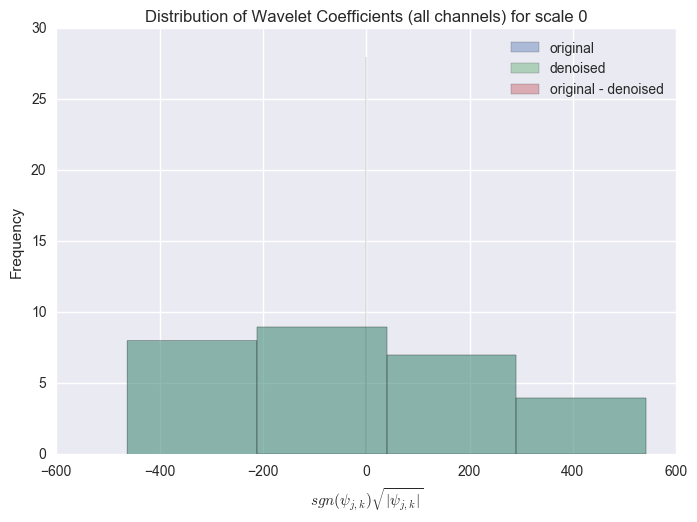

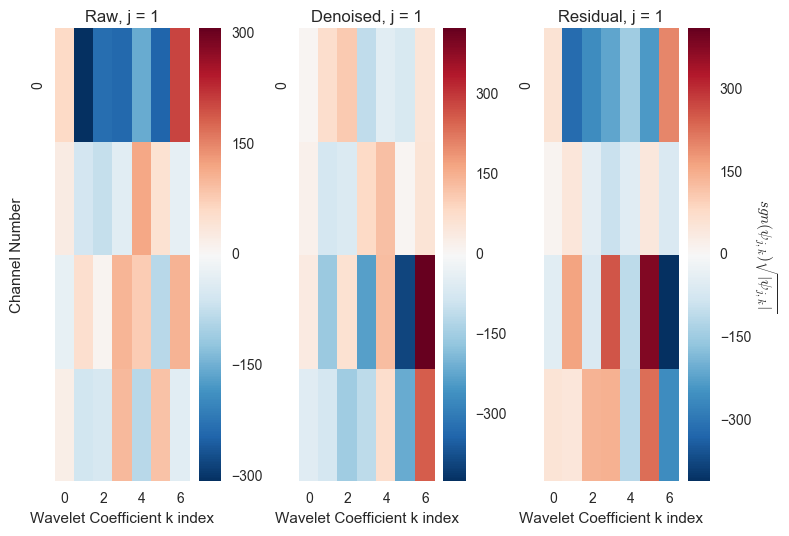

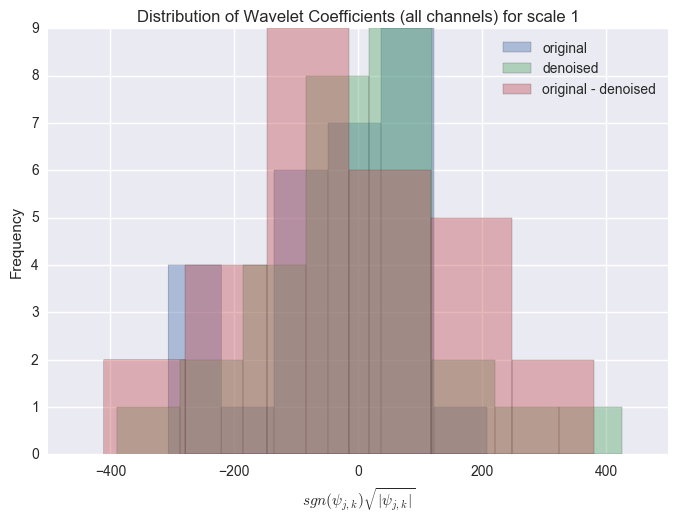

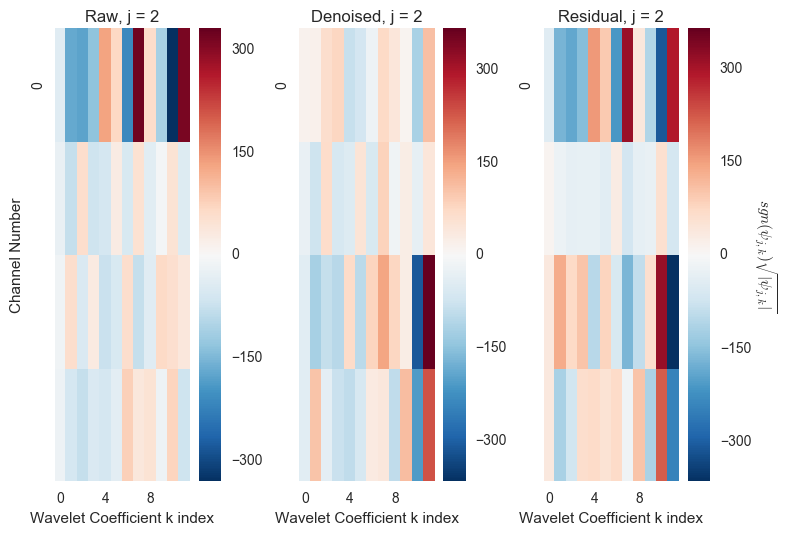

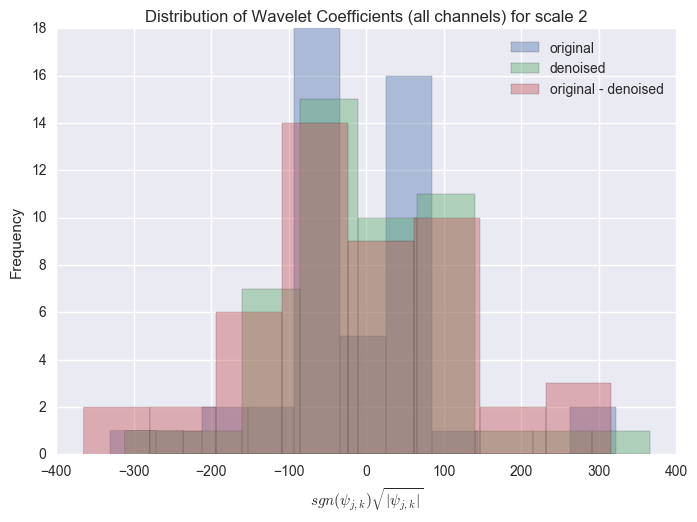

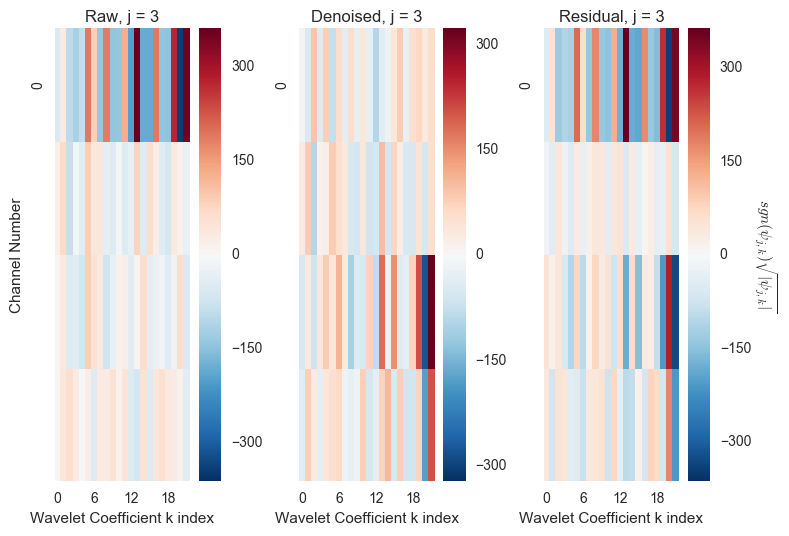

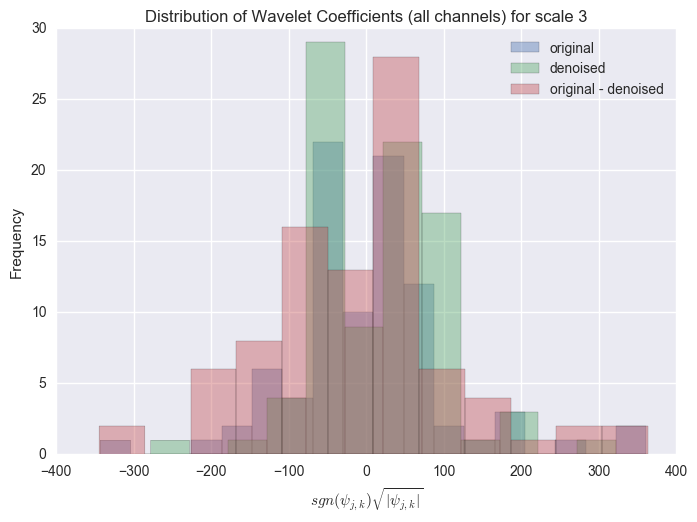

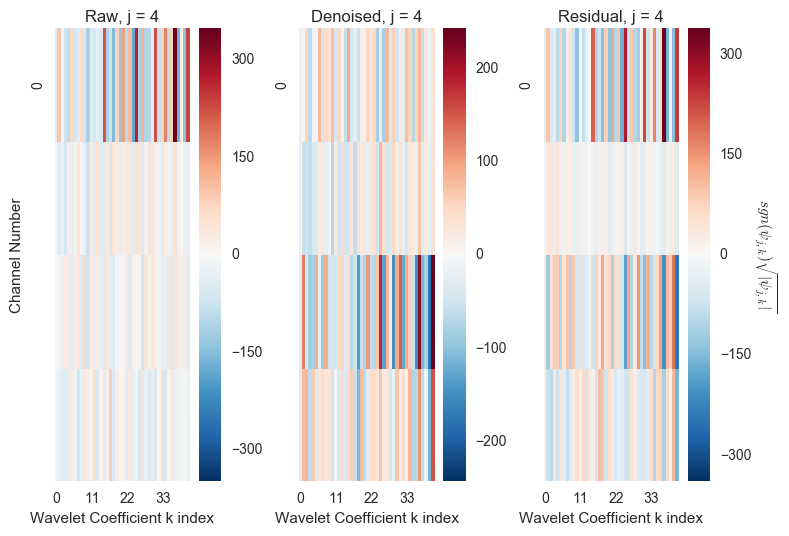

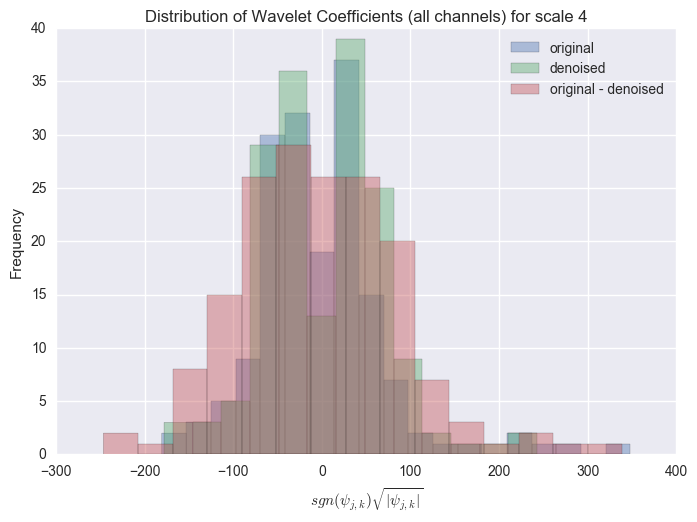

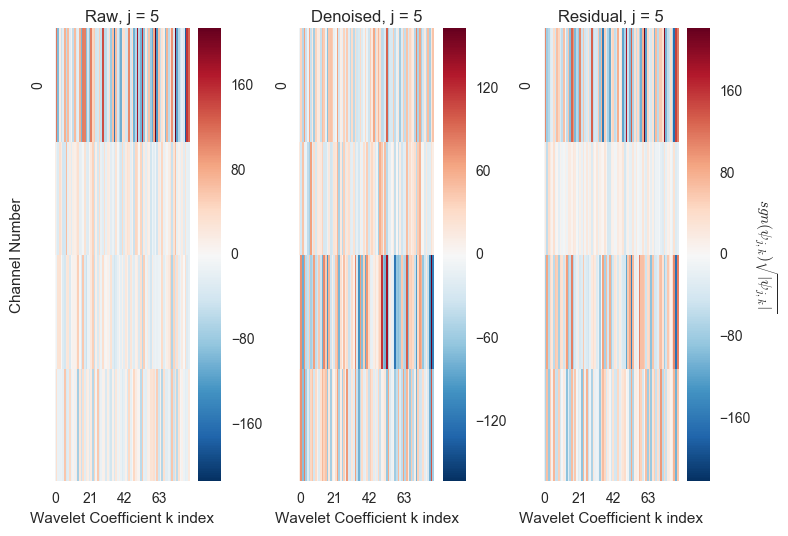

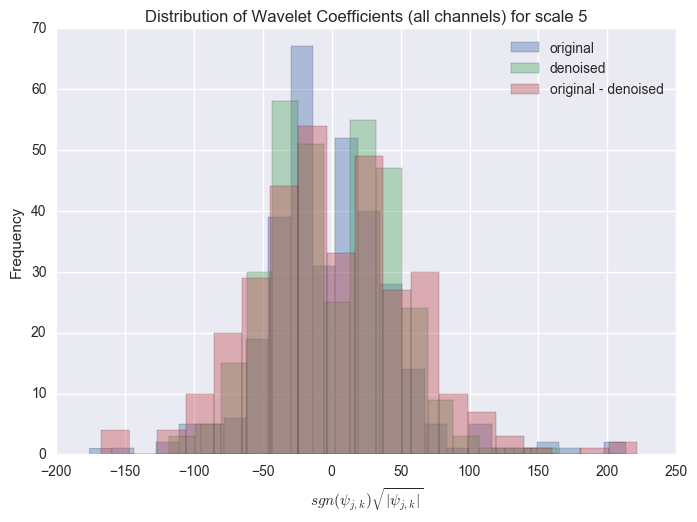

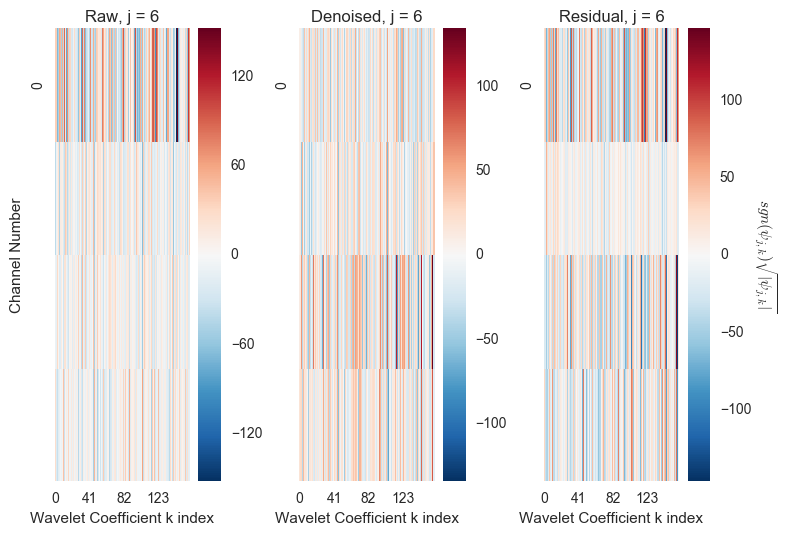

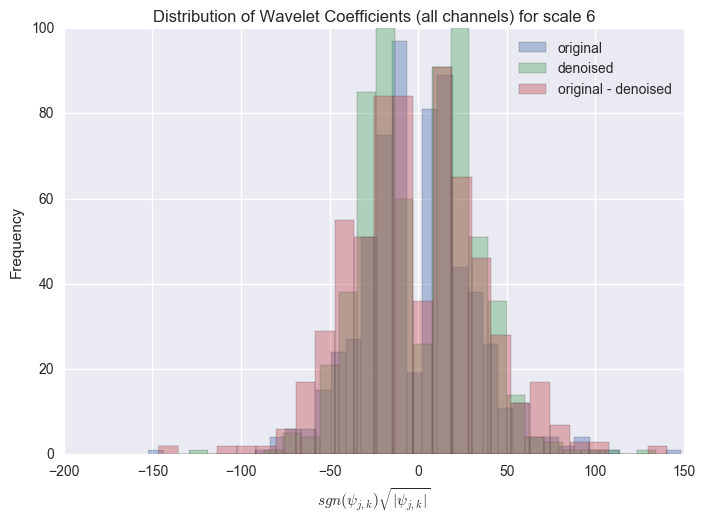

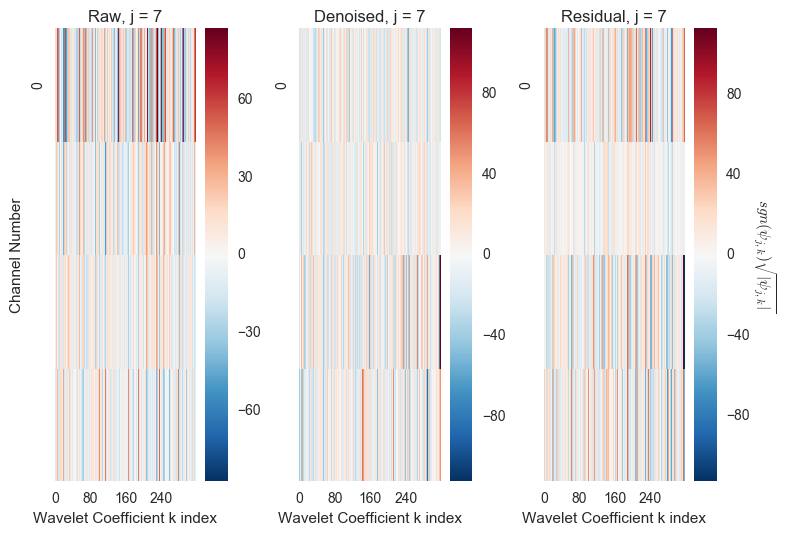

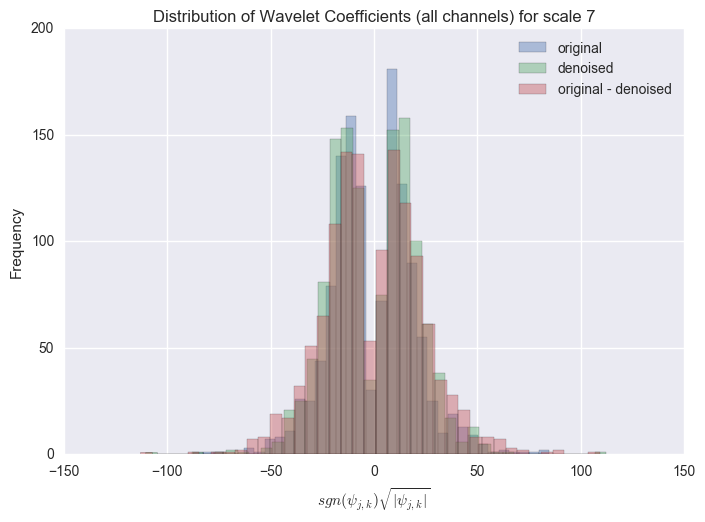

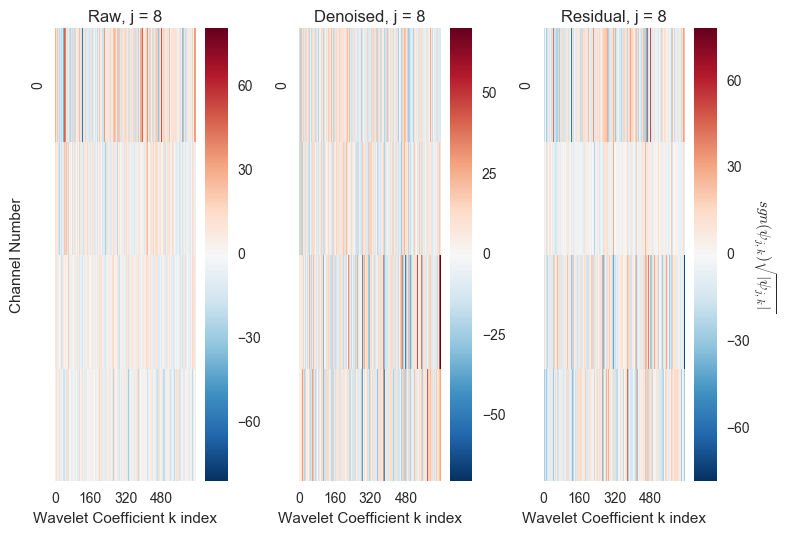

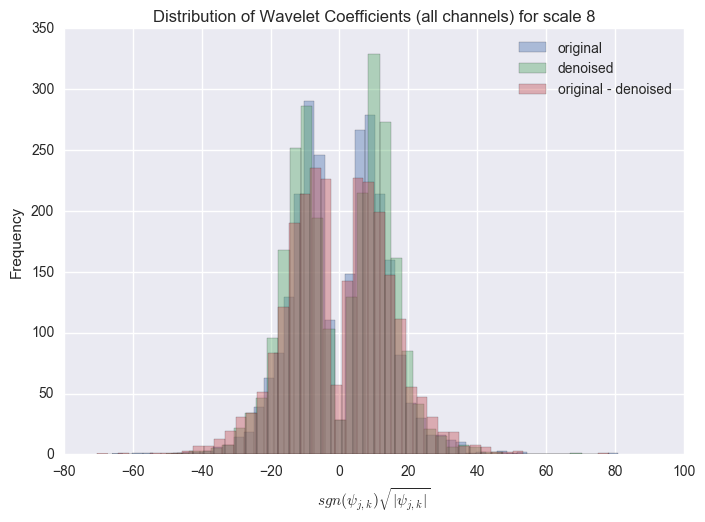

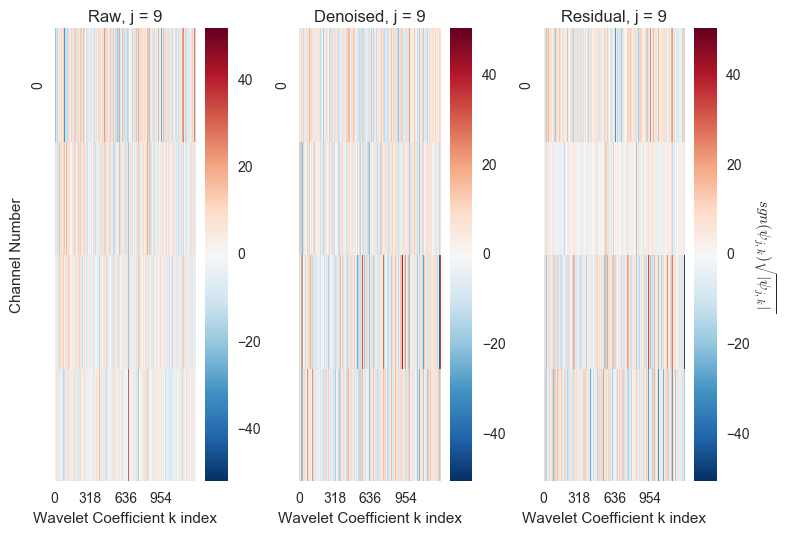

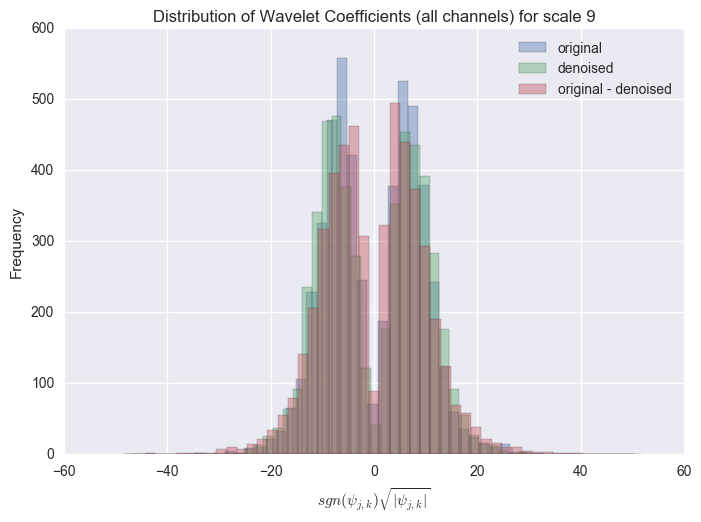

In [4]:
d_int = wavelet_coefficient_interp(d_den, p_local, p_global)